<a href="https://colab.research.google.com/github/ArifAygun/Magnimind-ML/blob/main/AA_8_02_Lab1_face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline


# Faces recognition example using eigenfaces and SVMs

The dataset used in this example is a preprocessed excerpt of the
"Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)


In [1]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

### Step 1. Download the dataset
- Download the data
- Find the number of samples, number of features, number of classes

In [1]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC


# Fetch the LFW (Labeled Faces in the Wild) dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Extract the data and target variables
X = lfw_people.data
y = lfw_people.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Print the dataset size information
n_samples, n_features = X.shape
n_classes = len(lfw_people.target_names)

print(f"Total dataset size:")
print(f"n_samples: {n_samples}")
print(f"n_features: {n_features}")
print(f"n_classes: {n_classes}")

# Perform Principal Component Analysis (PCA) for dimensionality reduction
n_components = 150  # Adjust the number of components as needed
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a Support Vector Machine (SVM) classifier using GridSearchCV for hyperparameter tuning
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]}
svm = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
svm.fit(X_train_pca, y_train)
y_pred = svm.predict(X_test_pca)

# Define target names
target_names = ['psoriasis', 'seboreic dermatitis', 'lichen planus', 'pityriasis rosea', 
                'cronic dermatitis', 'pityriasis rubra pilaris', 'Other']


# Print the classification report and confusion matrix
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=lfw_people.target_names))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

# Plot an example of the faces and their predicted labels
prediction_titles = [target_names[y_pred[i]] for i in range(y_pred.shape[0])]
true_titles = [target_names[y_test[i]] for i in range(y_test.shape[0])]

# Plotting code goes here...


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
Classification report:
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.64      0.78        28
     Colin Powell       0.76      0.90      0.83        63
  Donald Rumsfeld       0.86      0.79      0.83        24
    George W Bush       0.82      0.94      0.88       132
Gerhard Schroeder       1.00      0.80      0.89        20
      Hugo Chavez       1.00      0.55      0.71        22
       Tony Blair       0.93      0.79      0.85        33

         accuracy                           0.84       322
        macro avg       0.91      0.77      0.82       322
     weighted avg       0.86      0.84      0.84       322

Confusion matrix:
[[ 18   5   0   5   0   0   0]
 [  0  57   1   4   0   0   1]
 [  0   2  19   3   0   0   0]
 [  0   7   1 124   0   0   0]
 [  0   0   1   2  16   0   1]
 [  0   3   0   7   0  12   0]
 [  0   1   0   6   0   0  26]]


### Step 2. Train the Model
- Split the data into test and train datasets
- Compute a PCA (eigenfaces) on the face dataset
- Train an SVM Model
- Create a confusion matrix to evaluate the model.

In [2]:
# Compute PCA (eigenfaces) on the face dataset
n_components = 150
pca = PCA(n_components=n_components, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train an SVM model
svm = SVC()
svm.fit(X_train_pca, y_train)

# Predict labels for the test set
y_pred = svm.predict(X_test_pca)

# Create a confusion matrix to evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)


Confusion Matrix:
[[  9   2   0  17   0   0   0]
 [  0  54   0   8   0   0   1]
 [  0   2  13   9   0   0   0]
 [  0   6   0 126   0   0   0]
 [  0   0   1   7  12   0   0]
 [  0   3   0  12   0   7   0]
 [  0   1   0   9   0   0  23]]


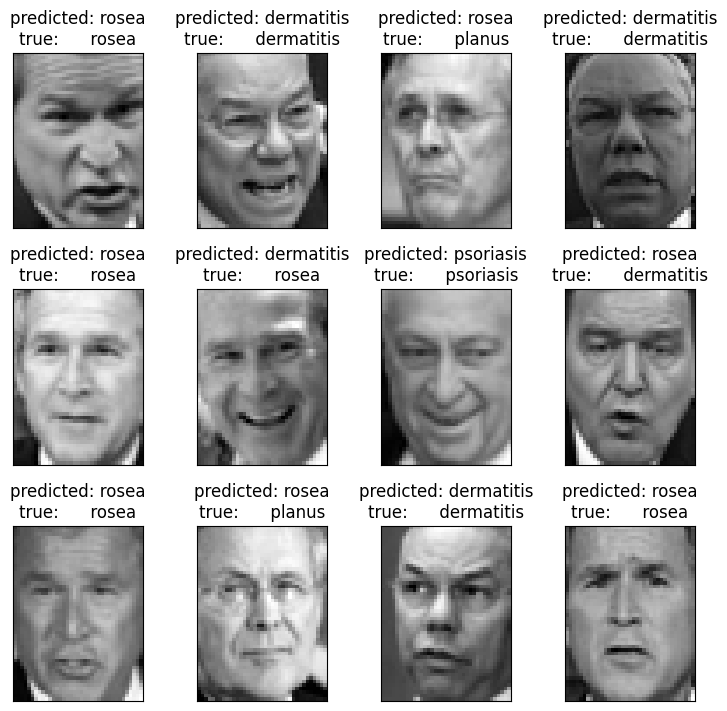

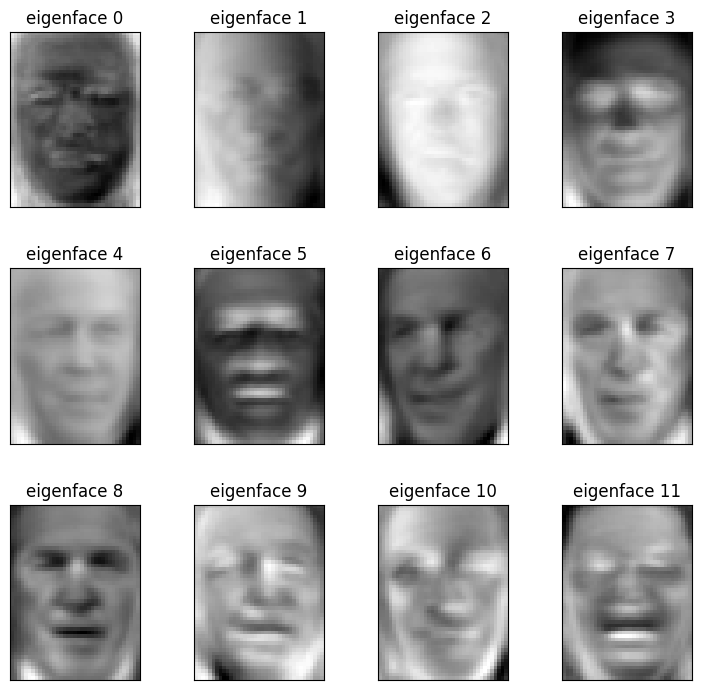

In [5]:
# #############################################################################
# Qualitative evaluation of the predictions using matplotlib
# Perform PCA
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
pca.fit(X_train)

# Get the eigenfaces
eigenfaces = pca.components_.reshape((n_components, h, w))

h = lfw_people.images.shape[1]
w = lfw_people.images.shape[2]

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()